## Hiring a Perfect Machine Learning Engineer

Installing of necessary libraries

In [2]:
!pip install PyMuPDF

!pip install XGBoost

!pip install tensorflow

!pip install transformers
!pip install tf-keras


In [3]:

import fitz  # PyMuPDF
import pandas as pd
import numpy as np
import nltk
import string
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

import xgboost as XGB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor
import tensorflow as tf

from transformers import DistilBertTokenizer, TFDistilBertModel
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers



C:\Users\jefft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Importing the Data
Preprocessing the Data (Job Descriptions)



In [4]:
#create a function to extract information for job description based on their headers
def extract_text_between_phrases(pdf_path, start_phrase, end_phrase):
    text = ''
    doc = fitz.open(pdf_path)
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        page_text = page.get_text()
        start_index = page_text.find(start_phrase)
        if start_index != -1:
            end_index = page_text.find(end_phrase, start_index + len(start_phrase))
            if end_index != -1:
                text += page_text[start_index + len(start_phrase):end_index]
                break
            else:
                text += page_text[start_index + len(start_phrase):]
        elif text: 
            end_index = page_text.find(end_phrase)
            if end_index != -1:
                text += page_text[:end_index]
                break
            else:
                text += page_text
    doc.close()
    return text.strip()
pdf_path = "Dataset\Job description.pdf"
## this is a case where we set the fix format for the job description pdf which can be done easily for the HR side. With this, the code can run for any type of job the hr finds , not just for this specific example.

## extract what you will do
start_phrase = "What you’ll do"
end_phrase = "Experience and qualifications"
Job_Scope = extract_text_between_phrases(pdf_path, start_phrase, end_phrase)
#print(Job_Scope)
## extract experience and qualifcations
start_phrase = "Experience and qualifications"
end_phrase = "Technical expertise"
Experience_and_qualifications = extract_text_between_phrases(pdf_path, start_phrase, end_phrase)
#print(Experience_and_qualifications)

## technical expertise
    #must have
start_phrase = "Must have"
end_phrase = "Considered as a plus"
Technical_expertise = extract_text_between_phrases(pdf_path, start_phrase, end_phrase)
#print(Technical_expertise)
    #considered as a plus
start_phrase = "Considered as a plus"
end_phrase = "Your job type"
plus_points = extract_text_between_phrases(pdf_path, start_phrase, end_phrase)
#print(plus_points)

combined_information = Technical_expertise.strip() + "\n" + plus_points.strip()
# preprocess the combined information
print(combined_information)
#not have used this portion but it is good for references for future works

●
Machine Learning, Clustering, Logistic Regression, Classification
●
Different libraries such as SciKit Learn, NumPy, Pandas, Matplotlib, Seaborn
●
Deep learning frameworks such as Tensorflow, Keras, PyTorch and application of Neural
Networks and models. CNN, RNN, GANs
●
Familiar with Natural Language Processing and associated libraries like NLTK, SpaCy,
Beautiful Soup
●
PySpark, Hadoop, and Big Data Pipelines
●
Data science methodology from exploratory data analysis, feature engineering, model
selection, deployment of the model at scale, and model evaluation
●
Deploying NLP architectures and Computer Vision Models in production
●
Transformers and other advance techniques in NLP
●
Familiar with Computer Vision models and object detection, OCR, OpenCV
●
Analytical Tools as it will reduce any medium for data transfers
●
Web frameworks like Django and databases like MongoDB, NoSQL, GraphQL
●
SQL, Firebase, AWS, Azure, Google Cloud Platform


Extraction of the text in the resume given fitz from pyMuPDF

In [5]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

#path for the dataset, etc the resumes pdfs
train_path = "Dataset/trainResumes/"
test_path = "Dataset/testResumes/"

# initialise an empty list for the texts extracted from the resume pdf
train_resumes = []
test_resumes = []

# ids
train_ids = list(train.CandidateID)
test_ids = list(test.CandidateID)

#function to get the text extraction from the pdf file
def extract_text_from_pdf(pdf_path):
    text = ""
    with fitz.open(pdf_path) as doc:
        for page in doc:
            text += page.get_text()
    return text

#function to extract multiple pdfs at once and store into our list
def pdf_to_string(path,ids,resumes):
     for i in ids:
        main_path = path+i+'.pdf'
        text = extract_text_from_pdf(main_path)
        str_list = text.split()
        str_list = str_list[:]
        string = ' '.join(str_list)
        resumes.append(string)


pdf_to_string(train_path, train_ids, train_resumes)
pdf_to_string(test_path,  test_ids, test_resumes)

# test
print(train_resumes[0])
print(test_resumes[0])

LIAM ANDREWS FRESHER WORK EXPERIENCE Intern Trainee, Jan 2020 to Apr 2020 DICTIS Responsible for performing and helping in decision making. ACADEMIC PROFILE B.Tech(Civil) Garodia Institute of Technosciences, 2020 EXECUTIVE SUMMARY Fresher with strong statistical and analytic capabilities. Someone who is driven by the passion for problem solving. Though I am from Civil Engineering background I have always been fascinated with data and how Machine Learning is evolving with iit. PERSONAL SKILLS Data Analyst, Data Mining, Data Visualization, Machine Learning, Linear Regression, Statistical Modeling, Predictive Modeling, SQL Server, Oracle, Python. PROJECTS Railway Signals Determiner using relay weight system. EXTRA-CURRICULARS Data Preprocessing with Python Data Visualization with Power BI
GRACE BAILRY M A C H I N E L E A R N I N G D E V E L O P M E N T A N D D E P L O Y M E N T SKILLS Software Engineer/Developer, Software Development, Project Management, Machine Learning, Computer Vision,

In [6]:
## now properly preprocessing of the text

# lowercasing all letters
train_resumes_lower = []
for resume in train_resumes:
    train_resumes_lower.append(resume.lower())

test_resumes_lower = []
for resume in test_resumes:
    test_resumes_lower.append(resume.lower())

## test to select words that are more impactful based on job description
combined_information.lower()
combined_information.translate(str.maketrans('', '', string.punctuation))

key_word = [word for word in combined_information.split() if len(word) >= 1]
print(key_word)
## not used in the end


#----------------------------------------------------------------------------------------

# punctuation removal
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

train_punc_removed = []
for resume in train_resumes_lower:
    punc_removed = remove_punctuation(resume)
    train_punc_removed.append(punc_removed)

test_punc_removed = []
for resume in test_resumes_lower:
    punc_removed = remove_punctuation(resume)
    test_punc_removed.append(punc_removed)
#----------------------------------------------------------------------------------------


# stopwords removal and remove single words
STOPWORDS = set(stopwords.words('english'))
print(STOPWORDS)
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if len(word) > 1 and word not in STOPWORDS])

train_stopwords_removed = []
for resume in train_punc_removed:
    stopwords_removed = remove_stopwords(resume)
    train_stopwords_removed.append(stopwords_removed)

test_stopwords_removed = []
for resume in test_punc_removed:
    stopwords_removed = remove_stopwords(resume)
    test_stopwords_removed.append(stopwords_removed)
#----------------------------------------------------------------------------------------

# lemmatization
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

train_lemma = []
for resume in train_stopwords_removed:
    lemma = lemmatize_words(resume)
    train_lemma.append(lemma)

test_lemma = []
for resume in test_stopwords_removed:
    lemma = lemmatize_words(resume)
    test_lemma.append(lemma)
#----------------------------------------------------------------------------------------
# to check if each of the preprocessing works
print("train_punc_removed:\n",train_punc_removed[0])
print("test_punc_removed:\n",test_punc_removed[0])
print("train_stopwords_removed:\n",train_stopwords_removed[0])
print("test_stopwords_removed:\n",test_stopwords_removed[0])
print("train_lemma\n",train_lemma[0])
print("test_lemma\n",test_lemma[0])

['●', 'Machine', 'Learning,', 'Clustering,', 'Logistic', 'Regression,', 'Classification', '●', 'Different', 'libraries', 'such', 'as', 'SciKit', 'Learn,', 'NumPy,', 'Pandas,', 'Matplotlib,', 'Seaborn', '●', 'Deep', 'learning', 'frameworks', 'such', 'as', 'Tensorflow,', 'Keras,', 'PyTorch', 'and', 'application', 'of', 'Neural', 'Networks', 'and', 'models.', 'CNN,', 'RNN,', 'GANs', '●', 'Familiar', 'with', 'Natural', 'Language', 'Processing', 'and', 'associated', 'libraries', 'like', 'NLTK,', 'SpaCy,', 'Beautiful', 'Soup', '●', 'PySpark,', 'Hadoop,', 'and', 'Big', 'Data', 'Pipelines', '●', 'Data', 'science', 'methodology', 'from', 'exploratory', 'data', 'analysis,', 'feature', 'engineering,', 'model', 'selection,', 'deployment', 'of', 'the', 'model', 'at', 'scale,', 'and', 'model', 'evaluation', '●', 'Deploying', 'NLP', 'architectures', 'and', 'Computer', 'Vision', 'Models', 'in', 'production', '●', 'Transformers', 'and', 'other', 'advance', 'techniques', 'in', 'NLP', '●', 'Familiar', 'w

In [7]:

# datasets
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test(with_results).csv')

# preprocessed and final dataset dataset
train_df = pd.concat([train, pd.DataFrame(train_lemma, columns=['resumes'])], axis = 1)
test_df = pd.concat([test, pd.DataFrame(test_lemma, columns=['resumes'])], axis = 1)

print(train_df.head())
print(test_df.head())

# apply TFIDF
tfidf = TfidfVectorizer(max_features=10000, 
                        strip_accents='unicode', 
                        analyzer='word', #this is where tokenization is done
                        lowercase=False,
                        ngram_range=(1, 1), 
                        stop_words = 'english')

tfidf_matrix_train = tfidf.fit_transform(train_df['resumes'])
tfidf_matrix_test = tfidf.transform(test_df['resumes'])
print(tfidf_matrix_train.shape)
print(tfidf_matrix_test.shape)

     CandidateID  Match Percentage  \
0  candidate_011             13.60   
1  candidate_113             36.63   
2  candidate_123             54.93   
3  candidate_012             41.46   
4  candidate_002             48.91   

                                             resumes  
0  liam andrew fresher work experience intern tra...  
1  ellie mackey executive profile actively seek j...  
2  telco trainee intern may 2018 dec 2018 data ha...  
3  jimmy gartner da professional profile look opp...  
4  amz loan mortgage erc analytics jun 2019 till ...  
     CandidateID  Match Percentage  \
0  candidate_014         43.284283   
1  candidate_098         12.088136   
2  candidate_075         41.872974   
3  candidate_016         49.886120   
4  candidate_131         33.909966   

                                             resumes  
0  grace bailry skill software engineerdeveloper ...  
1  voyagenius lab software developer ml dec 2018 ...  
2  keiron pavard skill data engineer data analy

Modeling and Score analysis

In [8]:

# dependent features (y values)
y_train = train_df['Match Percentage']
y_test = test_df['Match Percentage']

# define the multiple machine learning models
models = {
    "XGBoost": XGB.XGBRegressor(learning_rate=0.005, 
                             n_estimators=700, 
                             objective='reg:squarederror', 
                             max_depth=8, 
                             reg_lambda=1.3,
                             gamma=1,
                             min_child_weight=1.5,
                             max_delta_step=100,
                             random_state=31),
    "SVM": SVR(kernel='linear'),  
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "LinearRegression" : LinearRegression(),
    "DecisionTreeRegressor" :DecisionTreeRegressor(max_depth=50) 
    #add more models if needed

}
# print the header for the table
print("| {:<25} | {:<10} |{:<5} | {:<5} | {:<5} |".format("Model", "Score", "Mean Absolute Error" ,"Mean Square Error" , "r2 score"))
print("+--------------------------+-------------++-------------++-------------++-------------+")

# train and make predictions for each model
for model_name, model in models.items():
    model.fit(tfidf_matrix_train, y_train)
    preds = model.predict(tfidf_matrix_test)
    mse = mean_squared_log_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)  
    mse_regression = mean_squared_error(y_test, preds)  
    r2 = r2_score(y_test, preds)  
    score = 100 * max(0, 1 - mse)
    print(f"| {model_name:25} | {score:10.2f} | {mae:10.2f} | {mse_regression:10.2f} | {r2:10.2f} |")


| Model                     | Score      |Mean Absolute Error | Mean Square Error | r2 score |
+--------------------------+-------------++-------------++-------------++-------------+
| XGBoost                   |      65.51 |      11.96 |     248.22 |      -0.16 |
| SVM                       |      63.71 |      11.45 |     273.68 |      -0.28 |
| Random Forest             |      78.72 |       9.44 |     141.18 |       0.34 |
| KNN                       |      72.09 |      11.62 |     225.62 |      -0.06 |
| LinearRegression          |      81.15 |       8.34 |     122.00 |       0.43 |
| DecisionTreeRegressor     |      62.31 |      11.13 |     248.49 |      -0.16 |


In [9]:
''' Was testing to pick out best features but end up didnt train as well.

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


X_train = tfidf_matrix_train
X_test = tfidf_matrix_test

# Initialize an empty set to store selected features
selected_features = []

# Initialize a list to store the performance of each feature subset
best_scores = []

# Initialize a base model (e.g., Linear Regression)
model = LinearRegression()

# Number of features to select
num_features = X_train.shape[1]

for i in range(num_features):
    # Initialize variables to keep track of the best feature and its score
    best_feature = None
    best_score = float('inf')  # For regression, lower is better
    
    # Iterate over remaining features
    for feature_idx in range(X_train.shape[1]):
        # Check if the feature is not already selected
        if feature_idx not in selected_features:
            # Add the feature index to the selected features
            selected_features.append(feature_idx)
            
            # Train the model using selected features
            model.fit(X_train[:, selected_features], y_train)
            
            # Make predictions on the test set
            y_pred = model.predict(X_test[:, selected_features])
            
            # Calculate evaluation metric (e.g., Mean Squared Error)
            score = mean_squared_error(y_test, y_pred)
            
            # Check if the current feature subset improves performance
            if score < best_score:
                best_score = score
                best_feature = feature_idx
            
            # Remove the feature index from the selected features (backtrack)
            selected_features.remove(feature_idx)
    
    # Add the best feature index to the selected features
    selected_features.append(best_feature)
    
    # Add the performance of the best feature subset to the list
    best_scores.append(best_score)
    

# Select the feature subset with the best performance
best_feature_subset = selected_features[:best_scores.index(min(best_scores))+1]
print("Best feature subset indices:", best_feature_subset)
'''


' Was testing to pick out best features but end up didnt train as well.\n\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.linear_model import LinearRegression\n\n\nX_train = tfidf_matrix_train\nX_test = tfidf_matrix_test\n\n# Initialize an empty set to store selected features\nselected_features = []\n\n# Initialize a list to store the performance of each feature subset\nbest_scores = []\n\n# Initialize a base model (e.g., Linear Regression)\nmodel = LinearRegression()\n\n# Number of features to select\nnum_features = X_train.shape[1]\n\nfor i in range(num_features):\n    # Initialize variables to keep track of the best feature and its score\n    best_feature = None\n    best_score = float(\'inf\')  # For regression, lower is better\n    \n    # Iterate over remaining features\n    for feature_idx in range(X_train.shape[1]):\n        # Check if the feature is not already selected\n        if feature_idx not in selected_features:\n            # Add the feature index to the 

In [10]:
"""""
# Train the model using the selected features
model.fit(X_train[:, best_feature_subset], y_train)
preds = model.predict(tfidf_matrix_test)
mse = mean_squared_log_error(y_test, preds)
core = 100 * max(0, 1 - mse)
"""""

'""\n# Train the model using the selected features\nmodel.fit(X_train[:, best_feature_subset], y_train)\npreds = model.predict(tfidf_matrix_test)\nmse = mean_squared_log_error(y_test, preds)\ncore = 100 * max(0, 1 - mse)\n'

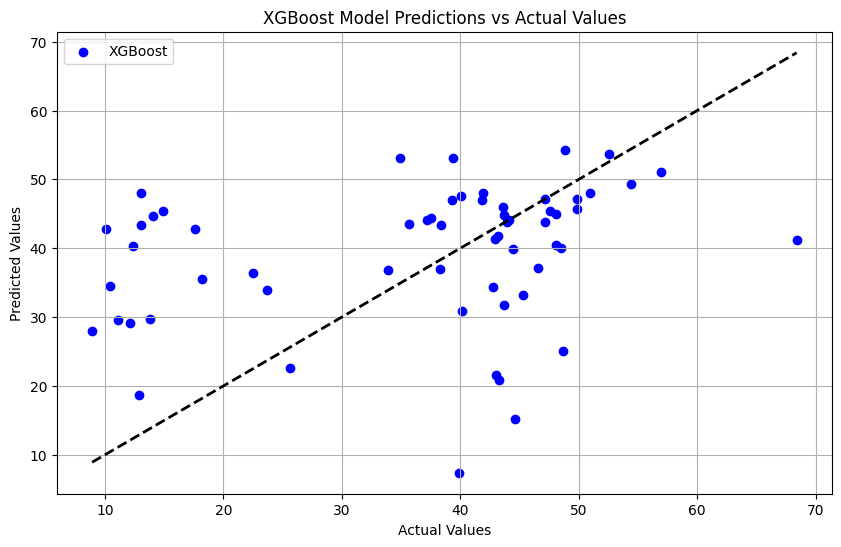

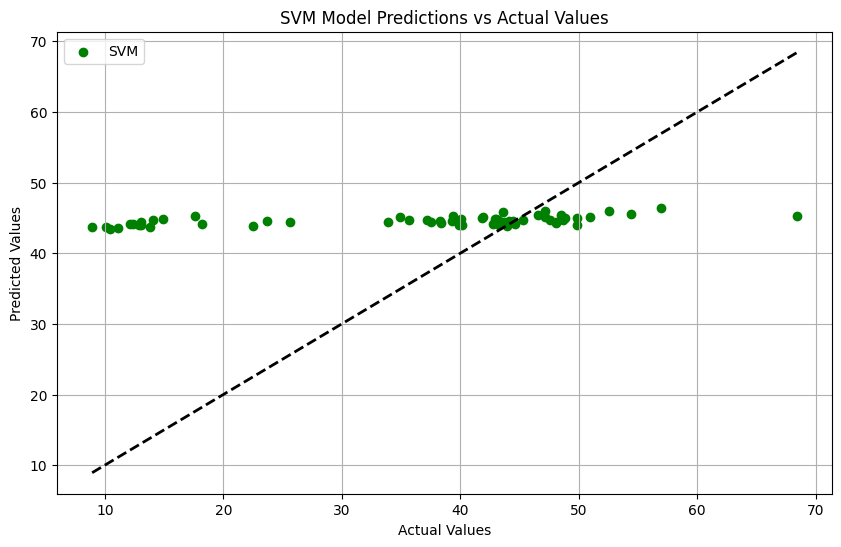

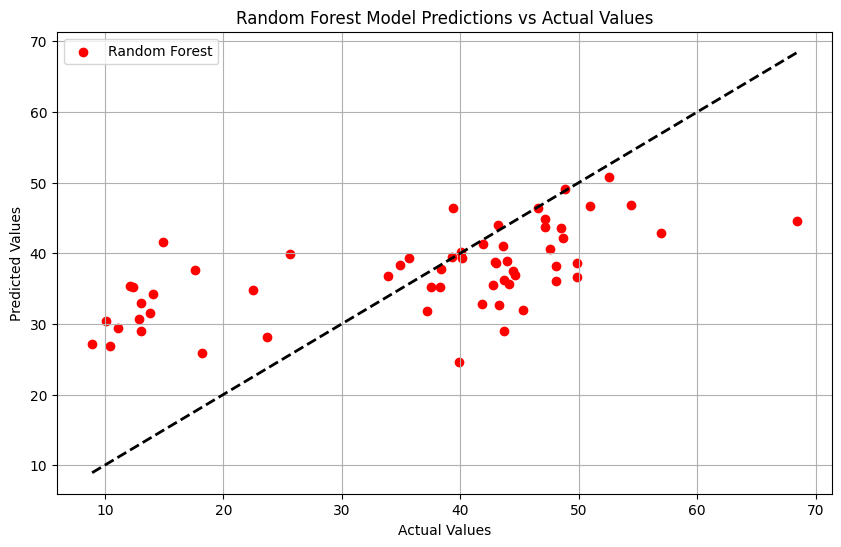

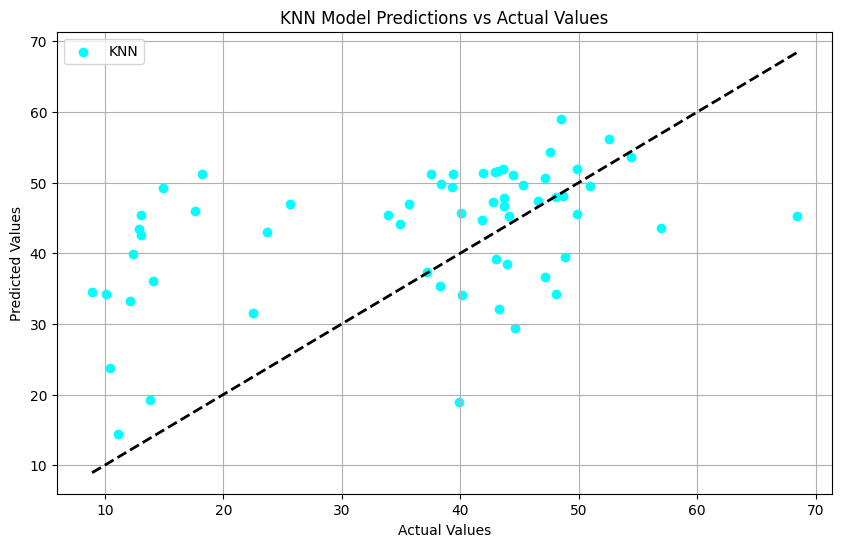

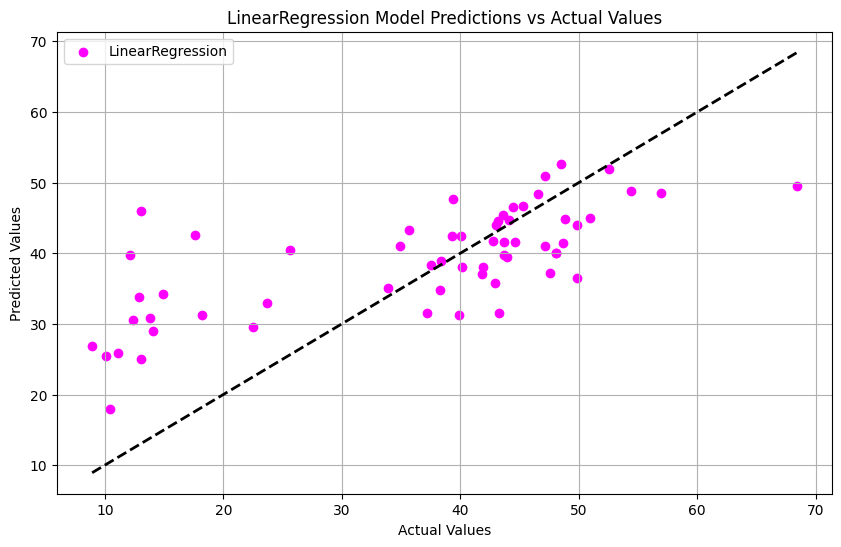

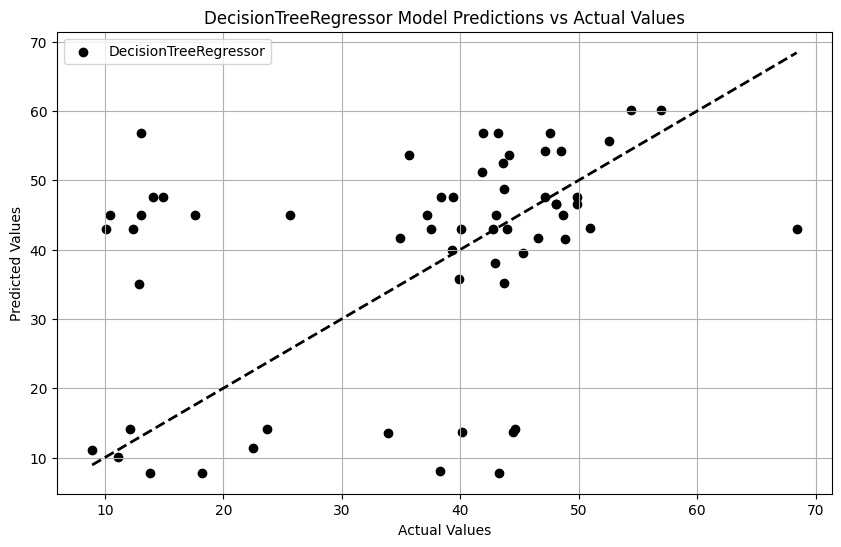

In [11]:
# to plot some scatterplot to see
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'black']
i = 0
for model_name, model in models.items():
    model.fit(tfidf_matrix_train, y_train)
    preds = model.predict(tfidf_matrix_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, preds, color=colors[i], label=model_name)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Model Predictions vs Actual Values')
    plt.legend()
    plt.grid(True)
    plt.show()
    i+=1


Stacking Ensemble

| StackingRegressor |      83.50 |       8.68 |     127.82 |       0.40 |


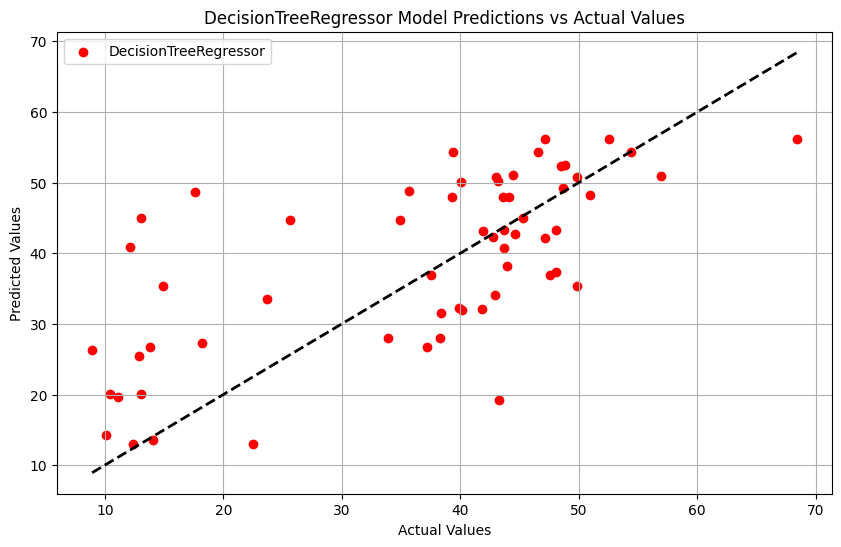

In [12]:
# define base models based on the previous highest scores.

base_models = [
    ('linear', LinearRegression()),
    ('Random Forest', RandomForestRegressor(n_estimators=100,random_state=42)),

]

# initialize the stacking regressor
stacked_model = StackingRegressor(estimators=base_models, final_estimator=KNeighborsRegressor(n_neighbors=5))
# train the stacking regressor
stacked_model.fit(tfidf_matrix_train, y_train)

# make predictions
preds = stacked_model.predict(tfidf_matrix_test)

msle = mean_squared_log_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)  
mse_regression = mean_squared_error(y_test, preds)  
r2 = r2_score(y_test, preds)  
score = 100 * max(0, 1 - msle)
print(f"| StackingRegressor | {score:10.2f} | {mae:10.2f} | {mse_regression:10.2f} | {r2:10.2f} |")

# plot the scatterplot for stacking emsemble
plt.figure(figsize=(10, 6))
plt.scatter(y_test, preds, color='red', label=model_name)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'{model_name} Model Predictions vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()


Feed Forward Neural Network with TF-IDF Features

In [13]:
traincsv = pd.read_csv('Dataset/train.csv')
testcsv = pd.read_csv('Dataset/test(with_results).csv')

y_train = traincsv['Match Percentage'].to_numpy()
y_test = testcsv['Match Percentage'].to_numpy()
# Convert sparse matrices to dense arrays
X_train_dense = tfidf_matrix_train.toarray()
X_test_dense = tfidf_matrix_test.toarray()
# create input-output pair and batch the data.
X_train_data = tf.data.Dataset \
                .from_tensor_slices((X_train_dense, y_train)) \
                .batch(4).prefetch(tf.data.AUTOTUNE)

X_test_data = tf.data.Dataset \
                .from_tensor_slices((X_test_dense, y_test)) \
                .batch(4).prefetch(tf.data.AUTOTUNE)

X_train_dense.shape
X_test_dense.shape

(60, 1927)

In [ ]:
# create simple FFNN with TF2 functional API

inp = layers.Input(shape=(1927,))
x = layers.Dense(64, activation='relu')(inp)
x = layers.Dense(8, activation='relu')(x)
out = layers.Dense(1, activation='relu')(x)
TFIDFmodel = tf.keras.Model(inputs=inp, outputs=out, name='TFIDF')
tf.keras.utils.plot_model(TFIDFmodel, "FFNN.png", show_shapes=True)




AttributeError: 'Functional' object has no attribute '_is_graph_network'

In [15]:


# compile the model with adam optemizer
TFIDFmodel.compile(optimizer=tf.keras.optimizers.Adam(
        learning_rate=1e-6), loss='mse', metrics=['mae'])

# train the model
history = TFIDFmodel.fit(
    X_train_data,
    epochs=40000
)

Epoch 1/40000
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1766.8962 - mae: 38.9947   
Epoch 2/40000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1766.8932 - mae: 38.9947
Epoch 3/40000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1766.8903 - mae: 38.9946
Epoch 4/40000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1766.8868 - mae: 38.9946
Epoch 5/40000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1766.8833 - mae: 38.9945 
Epoch 6/40000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1766.8799 - mae: 38.9945 
Epoch 7/40000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1766.8760 - mae: 38.9944
Epoch 8/40000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1766.8723 - mae: 38.9943
Epoch 9/40000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1766.8685 - mae: 38.9943
Epoch 10/40000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1766.8647 - mae: 38.9942
Epoch 11/40000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1766.8612 - mae: 38.9942
Epoch 12/40000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

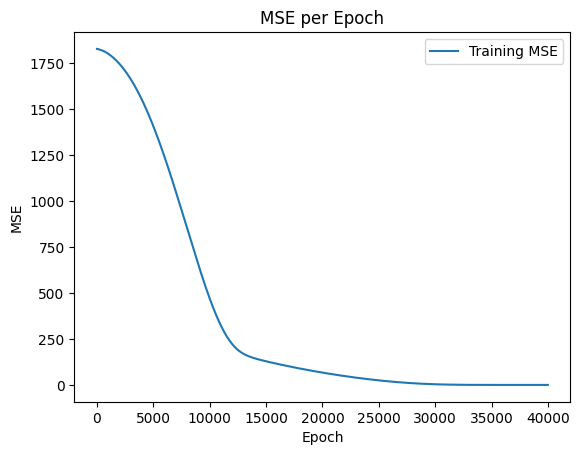

In [16]:
# show loss curve
loss = history.history['loss']

plt.plot(loss, label='Training MSE')
plt.legend(loc='upper right')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('MSE per Epoch')
plt.show()

In [17]:
# evaluate the model on the test data

predictions = TFIDFmodel.predict(X_test_data)
score  = 100* max(0,1-  mean_squared_log_error(y_test, predictions))
print(score)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
80.00451741687364


BERT with Feed Forward Neural Network


In [18]:


import tensorflow.keras.backend as K

# Clear TensorFlow session
K.clear_session()

# load pretrained models
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
distilbert_model = TFDistilBertModel.from_pretrained("distilbert-base-uncased")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [19]:
#extract the job_description from the pdf 
job_description = extract_text_from_pdf("Dataset\Job description.pdf")
# encode with the tokenizer
job_description_encoded = tokenizer.encode(job_description, max_length=300, padding='max_length', truncation=True)

In [20]:
traincsv = pd.read_csv('Dataset/train.csv')
testcsv = pd.read_csv('Dataset/test(with_results).csv')

# preprocess all resumes based on the BERT tokenizer and format

train_resumes_encoded = []
test_resumes_encoded = []
for train_resume in train_resumes:
    # encode with the tokenizer
    resume_encoded = tokenizer.encode(train_resume, max_length=300, padding='max_length', truncation=True)
    train_resumes_encoded.append(resume_encoded)
resumes_encoded = np.array(train_resumes_encoded)

for test_resume in test_resumes:
    # encode with the tokenizer
    test_resume_encoded = tokenizer.encode(test_resume, max_length=300, padding='max_length', truncation=True)
    test_resumes_encoded.append(test_resume_encoded)
test_resumes_encoded = np.array(test_resumes_encoded)



In [21]:
# get output corresponding to CLS token
job_description_cls = distilbert_model(np.array([job_description_encoded])).last_hidden_state[0][0]

In [22]:
X_train_data = []
for train_resume_encoded in train_resumes_encoded:
    # get output corresponding to CLS token
    train_resume_cls = distilbert_model(np.array([train_resume_encoded])).last_hidden_state[0][0]
    X_train_data.append(tf.concat(axis=0, values = [job_description_cls, train_resume_cls]))
X_train_data = np.array(X_train_data)
X_train_data.shape

X_test_data = []
for test_resume_encoded in test_resumes_encoded:
    # get output corresponding to CLS token
    test_resume_cls = distilbert_model(np.array([test_resume_encoded])).last_hidden_state[0][0]
    X_test_data.append(tf.concat(axis=0, values = [job_description_cls, test_resume_cls]))
X_test_data = np.array(X_test_data)
X_test_data.shape



(60, 1536)

In [23]:
#get the y values

y_train = traincsv['Match Percentage'].to_numpy()
y_test = testcsv['Match Percentage'].to_numpy()


In [24]:
# create x y pair
X_train_data_tf = tf.data.Dataset \
                .from_tensor_slices((X_train_data, y_train)) \
                .shuffle(100)


X_test_data_tf = tf.data.Dataset \
                .from_tensor_slices((X_test_data, y_test)) \
                .shuffle(100)

In [25]:
BATCH_SIZE = 4

train_ds = X_train_data_tf.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_ds = X_test_data_tf.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)



Model: "DistilBERT"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       196,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,817 (776.63 KB)

 Trainable params: 198,817 (776.63 KB)

 Non-trainable params: 0 (0.00 B)

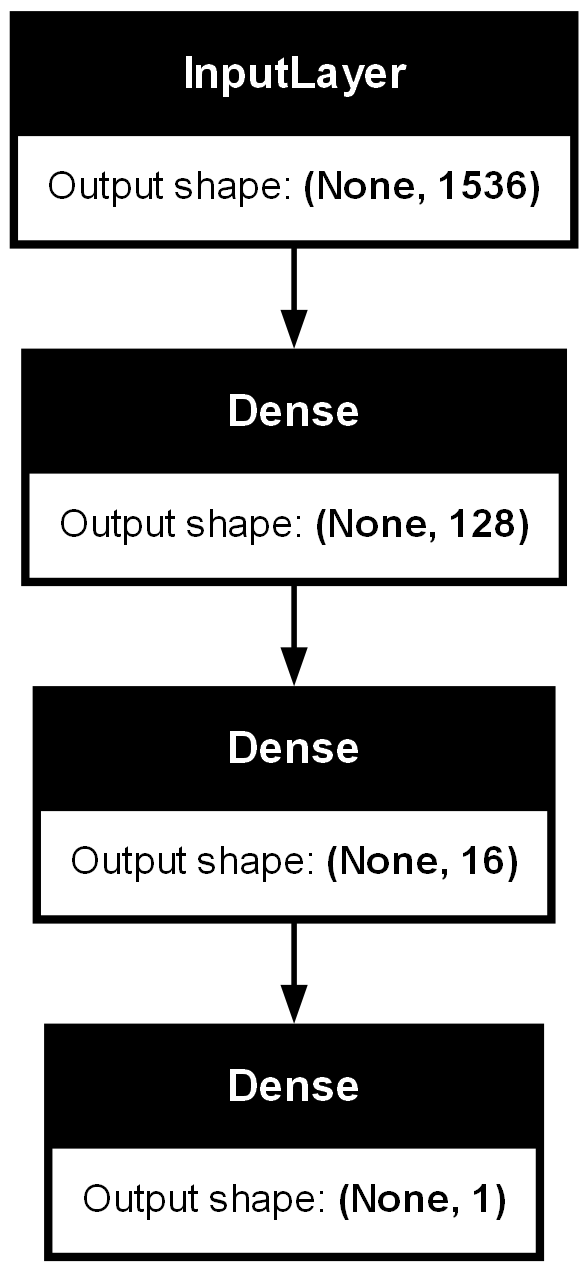

In [26]:
# create a feed forward neuron network model for BERT outputs


inp = tf.keras.layers.Input(shape=(1536,))
x = tf.keras.layers.Dense(128, activation='relu')(inp)
x = tf.keras.layers.Dense(16, activation='relu')(x)
out = tf.keras.layers.Dense(1, activation='relu')(x)

BERTmodel = tf.keras.Model(inputs=inp, outputs=out, name='DistilBERT')
BERTmodel.summary()
tf.keras.utils.plot_model(BERTmodel, "DistilBERT.png", show_shapes=True)


In [1]:

BERTmodel.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-6), loss='mse', metrics=['mae'])


# train the model
history = BERTmodel.fit(
    train_ds,
    epochs=20000
)

NameError: name 'BERTmodel' is not defined

In [ ]:

# get the MAE and Loss from the history object
mae = history.history['mae']
loss = history.history['loss']
epochs = range(1, len(mae) + 1)

# plot the MAE
plt.plot(epochs, mae, 'b', label='MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# plot the Loss
plt.plot(epochs, loss, 'r', label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# evaluate the model on the test data
test_loss, test_mae = BERTmodel.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

predictions = BERTmodel.predict(X_test_data)
score  = 100* max(0,1-  mean_squared_log_error(y_test, predictions))
print(score)